<a href="https://colab.research.google.com/github/Tarcioc2/ArquivosAulaIA/blob/master/SVM_da_aula_25082020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [ ]:
faces.data[200]

array([0.5165289 , 0.5123967 , 0.5082645 , ..., 0.56198347, 0.55785125,
       0.5661157 ], dtype=float32)

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv_lin = SVC(kernel='linear')
sv_lin

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(faces.data, y, test_size=0.25)

In [ ]:
print(y_test)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
from scipy.stats import sem

In [ ]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(sv_lin, x_train, y_train, cv=cv)

In [ ]:
print(scores)

In [ ]:
sv_lin.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
sv_lin.score(x_train, y_train)

1.0

In [ ]:
sv_lin.score(x_test, y_test)

1.0

In [ ]:
y_pred = sv_lin.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
mt = metrics.classification_report(y_test, y_pred)
print(mt)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        68
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred)
print(mc)

[[68  0]
 [ 0 32]]


In [ ]:
glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]
y = np.zeros(faces.target.shape[0])
for (start, end) in glasses:
  y[start:end + 1] = 1

print(y)  

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

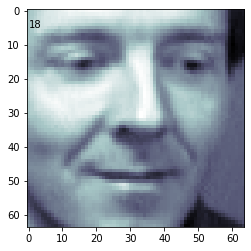

0.0


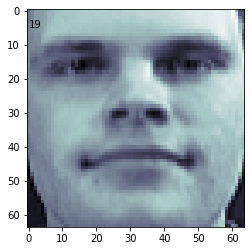

0.0


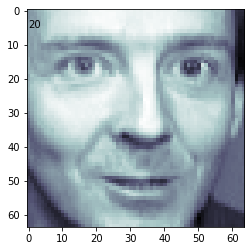

0.0


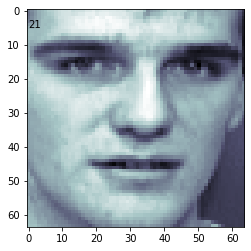

0.0


In [ ]:
def print_fromData(img_data):
    # reshape de 4096 para 64 por 64
    img = img_data.reshape(64,64)
    # cmap=plt.cm.bone muda o mapa de cor do pyplot para escala de cinsa
    plt.imshow(img, cmap=plt.cm.bone)
    # 
    plt.text(0,5,str(i))
    plt.show()

for i in range(18,22):
    print_fromData(x_train[i])
    print(y_train[i])